In [1]:
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
od.download('https://www.kaggle.com/datasets/eduardogarrido/synthetic-biased-gender-bank-loans-for-fair-ml')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aditib007
Your Kaggle Key: ··········


100%|██████████| 37.6k/37.6k [00:00<00:00, 2.97MB/s]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
loans = pd.read_csv('/content/synthetic-biased-gender-bank-loans-for-fair-ml/biased_gender_loans.csv')
loans

,salary,years_exp,sex,bank_loan
0,1107,19,Woman,No
1,1267,10,Woman,No
2,896,19,Woman,No
3,1226,16,Woman,No
4,1207,19,Woman,No
...,...,...,...,...
9995,1326,22,Woman,No
9996,1303,14,Woman,No
9997,1786,24,Man,Yes
9998,1351,13,Woman,No


#**EDA + Visualizations**

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   salary     10000 non-null  int64 
 1   years_exp  10000 non-null  int64 
 2   sex        10000 non-null  object
 3   bank_loan  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


<AxesSubplot:xlabel='bank_loan', ylabel='count'>

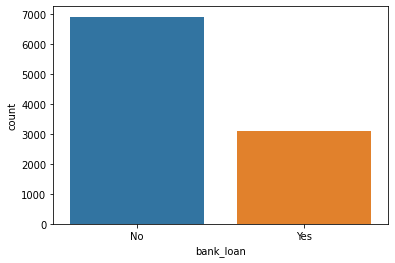

In [18]:
sns.countplot(data = loans, x = 'bank_loan')

<AxesSubplot:xlabel='bank_loan', ylabel='count'>

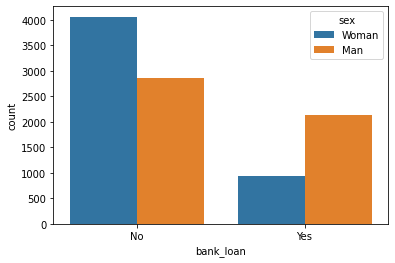

In [17]:
sns.countplot(data = loans, x = 'bank_loan', hue = 'sex')

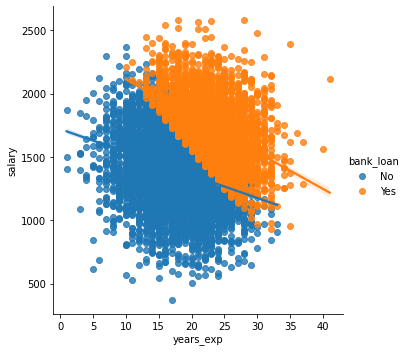

In [14]:
sns.lmplot(data = loans, x = 'years_exp', y = 'salary', hue = 'bank_loan')

<AxesSubplot:xlabel='years_exp', ylabel='salary'>

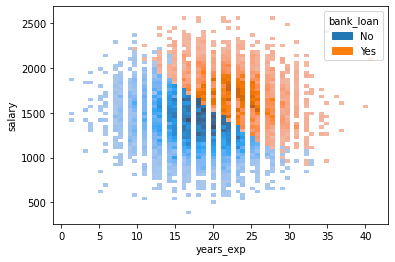

In [15]:
sns.histplot(data = loans, x = 'years_exp', y = 'salary', hue = 'bank_loan')

<AxesSubplot:xlabel='sex', ylabel='salary'>

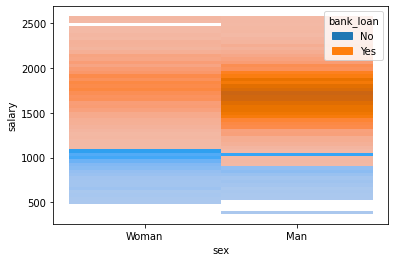

In [26]:
sns.histplot(data = loans, x = 'sex', y = 'salary', hue = 'bank_loan')

<AxesSubplot:xlabel='salary', ylabel='Count'>

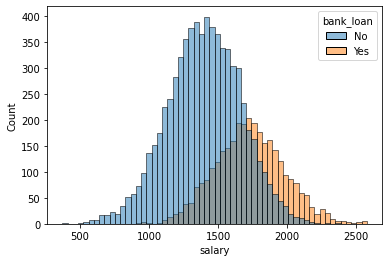

In [41]:
sns.histplot(data = loans, x = 'salary', hue = 'bank_loan')

In [28]:
loans.corr()

,salary,years_exp
salary,1.000000,-0.001804
years_exp,-0.001804,1.000000


In [31]:
ct = pd.crosstab(index = loans.sex, columns = loans.bank_loan)
ct

bank_loan,No,Yes
sex,,
Man,2850,2144
Woman,4059,947


In [33]:
from scipy.stats import chi2_contingency
chisq = chi2_contingency(ct)
chisq[1]

1.37082027666878e-148

In [34]:
pip install association-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3952 sha256=7bd38aad5a2e337c9f1fac25b5902df399c746bb49ce8ecf140923c57fe39965
  Stored in directory: /root/.cache/pip/wheels/49/ef/10/d93c981055c4fc0401028bc9dfda085ddd5ca204bcda0f2110
Successfully built association-metrics


In [36]:
import association_metrics as am
loans2 = loans.apply(lambda x: x.astype("category") if x.dtype == "O" else x)
cramersv = am.CramersV(loans2) 
cramersv.fit()

,sex,bank_loan
sex,1.000000,0.259825
bank_loan,0.259825,1.000000
